# RDKit lightning tutorial

Today, we’re going to take a short but high-impact tour of [RDKit](https://www.rdkit.org/docs/GettingStartedInPython.html), a powerful open-source toolkit for cheminformatics and machine learning with chemical data.
Whether you're analyzing a massive compound library or trying to design new molecules, [RDKit](https://www.rdkit.org/docs/GettingStartedInPython.html) is one of the most essential tools in your computational toolbox.

RDKit helps with a wide range of cheminformatics tasks. Here are just a few of the things you might use it for:

- Molecule parsing and standardization from SMILES, InChI, or other formats
- 2D and 3D structure visualization
- Fingerprinting and similarity search using metrics like Tanimoto similarity
- Substructure matching and SMARTS pattern search
- Molecular descriptor calculation (logP, molecular weight, TPSA, etc.)
- Conformer generation and geometry optimization
- Structure-activity relationship (SAR) analysis
- Virtual screening and chemical library filtering
- Building inputs for machine learning models in drug discovery or chemical property prediction

RDKit serves as the chemistry engine under the hood for many commercial and academic tools—what you’re learning here translates directly into real-world research.
You can explore the [Cookbook](https://www.rdkit.org/docs/Cookbook.html) or [Python API documentation](https://www.rdkit.org/docs/api-docs.html) to learn more about what RDKit can do.
Note: We often use the [`Chem`](https://www.rdkit.org/docs/source/rdkit.Chem.html) or [`DataStructs`](https://www.rdkit.org/docs/source/rdkit.DataStructs.html) modules.

## Installation

Since RDKit isn't included by default in Colab, we install it like this:

```python
!pip install rdkit==2024.9.6
```

Once that finishes, we are ready to get started.

## The Mol Object

When working with RDKit, everything begins and ends with the `Mol` object.
This object is RDKit’s internal representation of a molecule.
It’s the foundational data structure that holds all the chemical information we need—atoms, bonds, stereochemistry, aromaticity, computed properties, and more.

You can think of a `Mol` like a molecular graph: nodes are atoms, edges are bonds, and RDKit keeps track of all the chemical rules that tie it together.
Whether you want to compute a fingerprint, draw a 2D structure, match a substructure, or simulate conformations in 3D, you start with a `Mol`.

RDKit gives us a wide array of tools to build a `Mol` from different kinds of molecular input.
The most common method for small-molecule work is:

In [1]:
from rdkit import Chem

In [2]:
mol = Chem.MolFromSmiles("c1cc(CNCc2ccncc2)ccn1")
print(mol)

Here, we’re using a SMILES string—a compact, text-based way of describing a molecule—and turning it into a `Mol`. Once you've got that `Mol`, you're ready to do *everything else* RDKit offers.

RDKit’s `Mol` class (docs [here](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol)) is deceptively powerful. It gives you access to:

- Atoms and bonds with full control over atomic numbers, hybridization, formal charges, aromaticity, etc.
- Properties like molecular weight, logP, and custom annotations (which you can store as string, int, or float metadata)
- Coordinates for 2D/3D visualization and modeling
- Bookmarks and conformers for advanced structural operations
- Query functionality for substructure matching and filtering

In [3]:
mol.GetNumAtoms()

15

You can also iterate over the atoms or bonds like this:

In [4]:
for atom in mol.GetAtoms():
    print(atom.GetSymbol(), atom.GetIdx())

C 0
C 1
C 2
C 3
N 4
C 5
C 6
C 7
C 8
N 9
C 10
C 11
C 12
C 13
N 14


RDKit is designed to let you peek inside molecules at a fine level of detail—perfect for computational biology, drug design, and structure-based analysis.

RDKit doesn’t limit you to SMILES.
Depending on your data source, you might be working with MOL files, PDBs, FASTA sequences, HELM strings, or even image files (!).
RDKit offers a suite of `MolFromX` functions in the [`rdkit.Chem.rdmolfiles`](https://www.rdkit.org/docs/search.html?q=rdmolfiles.MolFrom) module to convert these into `Mol` objects.

Here are just a few formats you can use:

| Input Format        | Function Name                        |
|---------------------|--------------------------------------|
| SMILES              | `Chem.MolFromSmiles()`               |
| SMARTS (substructure) | `Chem.MolFromSmarts()`             |
| Mol block           | `Chem.MolFromMolBlock()`             |
| Mol2 file           | `Chem.MolFromMol2File()`             |
| PDB file            | `Chem.MolFromPDBFile()`              |
| FASTA sequence      | `Chem.MolFromFASTA()`                |

So, if you’re ever handed a molecular structure in a file or format you’ve never seen before, your first question should be: *“Which `MolFromX` function will get me a `Mol`?”*

Once you have that, you’re in business.

The `Mol` object is more than a data structure—it’s your interface to chemical knowledge.
Every RDKit function you’ll use (for fingerprints, descriptors, depictions, or simulations) takes a `Mol` as input.
If you understand how to create, inspect, and work with `Mol`s, you’ve already unlocked 80% of RDKit’s power.

So as we begin today’s activity—and later when you build more complex cheminformatics pipelines—remember: if you’ve got a `Mol`, you’ve got a molecule.

## Visualizing molecules

Once you’ve created a `Mol` object, one of the first things you’ll probably want to do is *see* the structure.
Visualization helps you quickly validate whether the SMILES you loaded matches your expectations—and gives you an immediate sense of the chemical space you’re working in.

RDKit makes this incredibly easy with its `Draw` module, which renders molecules in 2D with publication-quality depictions.

In [5]:
from rdkit.Chem import Draw

Now, to visualize this molecule, we use `MolToImage()` from the `rdkit.Chem.Draw` module.
This generates a 2D image that you can view inline in Jupyter or Colab. No file saving, no rendering engines—it just works.

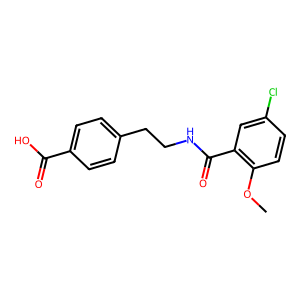

In [ ]:
mol = Chem.MolFromSmiles("COC1=C(C=C(C=C1)Cl)C(=O)NCCC2=CC=C(C=C2)C(=O)O")
Draw.MolToImage(mol)

If you want more control over how the molecule is rendered—such as highlighting atoms, showing atom indices, or drawing multiple molecules at once—you can use `MolDraw2D` or functions like `MolToImage(mol, size=(300, 300))`.

Here’s a handy trick if you're working with multiple molecules and want a side-by-side view.
This will draw the molecules in a tidy grid, perfect for comparing related compounds or visualizing a screening library.

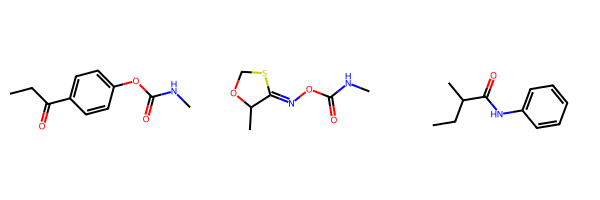

In [8]:
mols = [
    Chem.MolFromSmiles(s)
    for s in [
        "CCC(=O)C1=CC=C(C=C1)OC(=O)NC",
        "CC1C(=NOC(=O)NC)SCO1",
        "CCC(C)C(=O)NC1=CC=CC=C1",
    ]
]
Draw.MolsToGridImage(mols, molsPerRow=3)

## Molecular Properties and Descriptors

Once you have a molecule in RDKit, you can compute a wide range of molecular properties—also called descriptors.
These are numerical values that attempt to summarize something chemically or biologically relevant about a molecule: its size, shape, polarity, or even its likelihood to permeate a cell membrane.

This is especially useful in early drug discovery, where you may want to quickly filter a library to exclude toxic, too-large, or metabolically unstable compounds—before spending a cent on synthesis or testing.

RDKit provides access to many common descriptors right out of the box.

In [9]:
from rdkit.Chem import Descriptors

Let’s take a look at some of the most widely used descriptors. We’ll start with a simple molecule:

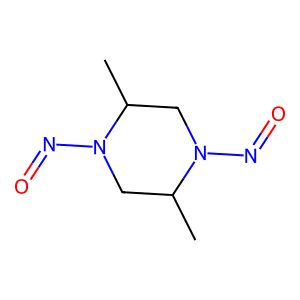

In [10]:
mol = Chem.MolFromSmiles("CC1CN(C(CN1N=O)C)N=O")
Draw.MolToImage(mol)

Now let’s compute a few key properties:

In [11]:
Descriptors.MolWt(mol)

172.188

In [12]:
Descriptors.MolLogP(mol)

0.7438

In [13]:
Descriptors.NumRotatableBonds(mol)

2

In [14]:
Descriptors.NumHDonors(mol), Descriptors.NumHAcceptors(mol)

(0, 4)

In [15]:
Descriptors.TPSA(mol)

65.34

Each of these descriptors gives you insight into how the molecule might behave—its solubility, permeability, or conformational flexibility.
These are commonly used in rules like Lipinski’s Rule of Five, which helps flag molecules that may have poor oral bioavailability.

Some of these properties are fairly objective—for example, molecular weight or the number of rotatable bonds.
But others, like logP or TPSA, are based on heuristic models and can vary significantly between software packages. LogP, in particular, is a notoriously tricky beast.

> LogP estimates how soluble a compound is in lipids (like cell membranes) vs. water. It’s important for absorption and permeability—but it’s also *notoriously inaccurate* when calculated computationally.

That doesn’t mean it’s useless—it just means we shouldn’t mistake an RDKit-predicted logP of 3.2 for a high-precision measurement.
Think of it as a rough estimate to support filtering or prioritization, not as a definitive answer.

Same goes for predicted TPSA, which is useful in ranking—but no substitute for actual permeability data.

Descriptors are easy to calculate but not always easy to interpret.
Used wisely, they help you *ask better questions* about chemical behavior.
But don’t let the elegance of the numbers distract from the underlying chemistry—or experimental reality.

Always ask:

- *Is this descriptor interpretable?*  
- *Is it validated for this type of molecule?*  
- *How sensitive is it to small changes in structure?*  

Descriptors are a starting point—not an answer.

## Fingerprinting molecules

At some point, we need to compare molecules. But comparing full 3D structures atom-by-atom isn’t scalable or efficient—especially when screening libraries of 10,000 or 1,000,000 compounds.

That’s where fingerprints come in.

A molecular fingerprint is a compact, vectorized summary of a molecule’s structure. It's usually binary (on/off), or a count-based representation, where each bit or integer in the vector corresponds to a specific substructure or atomic environment.

This lets us use fast math—dot products, Tanimoto similarity, etc.—to quantify how similar two molecules are.

In [16]:
from rdkit.Chem import AllChem

The most commonly used fingerprint in drug discovery is the Morgan fingerprint, better known by its commercial branding as ECFP (Extended-Connectivity FingerPrint). Morgan fingerprints are circular: they look at neighborhoods around each atom, collecting information about atoms and bonds within a certain radius.

In [17]:
fpgen = AllChem.GetMorganGenerator(radius=2)  # ECFP4 equivalent

This creates a fixed-length bit vector of 2048 bits by default. Each bit represents a substructure that exists somewhere in the molecule.

In [18]:
mol = Chem.MolFromSmiles("C1=CC(=O)N(C1=O)CCCCCC(=O)O")
fp = fpgen.GetFingerprint(mol)

type(fp), len(fp)

(rdkit.DataStructs.cDataStructs.ExplicitBitVect, 2048)

Want to see how many of those bits are “on”?

In [19]:
fp.GetNumOnBits()

25

RDKit offers two main formats of Morgan fingerprints:

- `GetFingerprint()` → ExplicitBitVect: A dense bit vector (binary), great for similarity calculations
- `GetSparseCountFingerprint()` → SparseIntVect: A dictionary of (bit_id → count), which captures *how many times* each substructure appears. This can be useful for weighting frequent features or for machine learning input.

In [20]:
count_fp = fpgen.GetSparseCountFingerprint(mol)
count_fp.GetNonzeroElements()

{10565946: 2,
 161963127: 1,
 311968854: 1,
 413476074: 2,
 422165373: 1,
 851463431: 1,
 864662311: 1,
 864942730: 3,
 951239203: 2,
 1167322652: 1,
 1510328189: 1,
 1510461303: 3,
 1533864325: 1,
 2092489639: 1,
 2245384272: 5,
 2246699815: 1,
 2257970297: 1,
 2456037498: 1,
 2529809651: 1,
 2530279745: 2,
 3217380708: 2,
 3218693969: 2,
 3346582092: 1,
 3378203162: 2,
 4162508222: 1,
 4278941385: 1}

## Measuring Similarity

Once we have fingerprints for two molecules, we can compare them to ask how structurally similar they are.
This is a cornerstone of virtual screening, hit expansion, and SAR analysis.

The most common similarity metric used in cheminformatics is the Tanimoto similarity—also known as the Jaccard index in other fields.

Imagine that a fingerprint is a binary vector—just a series of bits like this:

```python
fp1 = [1, 0, 1, 1, 0, 0, 1]
fp2 = [1, 1, 1, 0, 0, 0, 1]
```

Each `1` represents the presence of a substructure in the molecule.

The Tanimoto similarity between two fingerprints is calculated as:

$$
\text{Tanimoto}(A, B) = \frac{c}{a + b - c}
$$

Where:

- $a$ = number of bits set to 1 in molecule A  
- $b$ = number of bits set to 1 in molecule B  
- $c$ = number of bits set to 1 in both fingerprints (i.e., intersection)

So in this example:
- $a = 4$
- $b = 4$
- $c = 2$

$$
\text{Tanimoto} = \frac{2}{4 + 4 - 2} = \frac{2}{6} = 0.333
$$

It’s a simple but powerful metric: it gives 1.0 for identical molecules (same bits), and values closer to 0.0 for dissimilar ones.

Let’s see this in action:

In [21]:
from rdkit import DataStructs

In [22]:
mol1 = Chem.MolFromSmiles("CCCCCOC1=CC=CC=C1NC(=O)OCCN2CCCCC2")
mol2 = Chem.MolFromSmiles("CCCCCOC1=CC=C(C=C1)NC(=O)OCCN2CCCCC2")

fp1 = fpgen.GetFingerprint(mol1)
fp2 = fpgen.GetFingerprint(mol2)

DataStructs.TanimotoSimilarity(fp1, fp2)

0.6538461538461539

This gives you a value between 0 and 1. In most drug discovery pipelines, a Tanimoto similarity above 0.85 is considered "very similar", while 0.4 to 0.7 might indicate shared core features but meaningful diversity.

While Tanimoto similarity is the gold standard in cheminformatics, RDKit also supports a few other metrics.
Each one compares binary or count fingerprints slightly differently, and choosing the right one depends on the structure of your data and what you care about in the comparison.

Here are three alternatives worth knowing.

### Dice Similarity

$$
\text{Dice}(A, B) = \frac{2c}{a + b}
$$

Where:
- $a$, $b$ = number of bits set in each fingerprint
- $c$ = number of shared bits

This emphasizes shared features more strongly than Tanimoto. It gives higher scores when the two fingerprints are small but overlap heavily.
Use Dice when:

- You're comparing sparse fingerprints (e.g., small molecules)
- You want to be more sensitive to partial overlap
- You care more about the proportion of shared bits than total size

In [23]:
DataStructs.DiceSimilarity(fp1, fp2)

0.7906976744186046

### Cosine Similarity

$$
\text{Cosine}(A, B) = \frac{c}{\sqrt{a \cdot b}}
$$

Cosine similarity comes from vector space models. It looks at the angle between two vectors rather than their overlap.

Use Cosine when:

- You're using count-based fingerprints (not binary)
- You're analyzing feature frequency, not just presence
- You're feeding fingerprints into ML models and want to compare vectors like word embeddings or gene expression profiles

In [24]:
DataStructs.CosineSimilarity(fp1, fp2)

0.7909115788387002

### Tversky Similarity

$$
\text{Tversky}(A, B) = \frac{c}{c + \alpha(a - c) + \beta(b - c)}
$$

This is a generalization of Tanimoto that lets you weight the importance of asymmetry. You set parameters $\alpha$ and $\beta$ to control the penalty for features in one molecule but not the other.

- Tanimoto is the special case where $\alpha = \beta = 1$
- Dice is the case where $\alpha = \beta = 0.5$

Use Tversky when:

- You want to compare a query molecule against a larger library and emphasize features present in the query
- You’re building a similarity search tool and want to bias the comparison (e.g., penalize unmatched features more strongly)

In [25]:
DataStructs.TverskySimilarity(fp1, fp2, 0.5, 0.5)

0.7906976744186046

In most cheminformatics workflows, Tanimoto is still your go-to. But it’s valuable to know these alternatives—especially when doing custom similarity searches, clustering, or feeding data into machine learning models where symmetry and scale might matter.